In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [31]:
data = pd.read_csv('D:\Data sets\BreastCancer.csv')

In [32]:
data

,sr,Id,Cl_thickness,Cell_size,Cell_shape,Marg_adhesion,Epith_c_size,Bare_nuclei,Bl_cromatin,Normal_nucleoli,Mitoses,out
0,1,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,2,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,3,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,4,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,5,1017023,4,1,1,3,2,1.0,3,1,1,benign
...,...,...,...,...,...,...,...,...,...,...,...,...
694,695,776715,3,1,1,1,3,2.0,1,1,1,benign
695,696,841769,2,1,1,1,2,1.0,1,1,1,benign
696,697,888820,5,10,10,3,7,3.0,8,10,2,malignant
697,698,897471,4,8,6,4,3,4.0,10,6,1,malignant


In [18]:
color = data.out

In [19]:
le = LabelEncoder()

In [34]:
color = le.fit_transform(color)

In [21]:
df = data.drop(['sr', 'Id', 'out'], axis=1)

In [22]:
df.isna().sum()

Cl_thickness        0
Cell_size           0
Cell_shape          0
Marg_adhesion       0
Epith_c_size        0
Bare_nuclei        16
Bl_cromatin         0
Normal_nucleoli     0
Mitoses             0
dtype: int64

In [23]:
df.Bare_nuclei = df.Bare_nuclei.fillna(df.Bare_nuclei.mean())

In [24]:
scalar = StandardScaler()

In [25]:
new_df = scalar.fit_transform(df)

In [26]:
new_df

array([[ 0.20693572, -0.69999505, -0.74329904, ..., -0.17966213,
        -0.61182504, -0.34391178],
       [ 0.20693572,  0.28384518,  0.2668747 , ..., -0.17966213,
        -0.28411186, -0.34391178],
       [-0.50386559, -0.69999505, -0.74329904, ..., -0.17966213,
        -0.61182504, -0.34391178],
       ...,
       [ 0.20693572,  2.25152563,  2.28722218, ...,  1.87236122,
         2.33759359,  0.23956962],
       [-0.14846494,  1.59563215,  0.94032386, ...,  2.69317056,
         1.02674087, -0.34391178],
       [-0.14846494,  1.59563215,  1.61377302, ...,  2.69317056,
         0.37131451, -0.34391178]])

In [38]:
model = PCA(n_components=2)

In [39]:
dataframe = model.fit_transform(new_df)

In [40]:
dataframe

array([[-1.46295257, -0.10203837],
       [ 1.46378986, -0.55016979],
       [-1.58546559, -0.07153057],
       ...,
       [ 3.82064495, -0.16671142],
       [ 2.26521017, -1.10653824],
       [ 2.66056751, -1.19103544]])

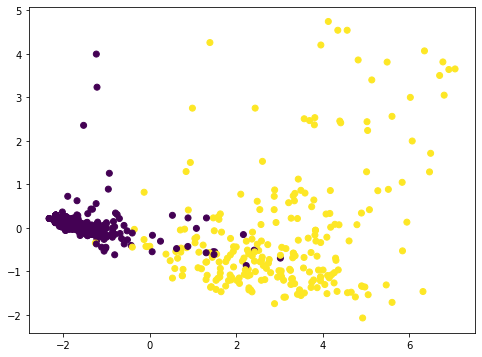

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(dataframe[:,0], dataframe[:,1], c=color)